In [1]:
import numpy as np
import math
import time
from matplotlib import pyplot as plt

## Burgers equation

Viscous Burgers equation in 1D is given by:
$\frac{\partial u}{\partial t} + \frac{1}{2} u\frac{\partial u}{\partial x} = \nu \frac{\partial^2 u}{\partial x^2}$
with $x \in [a, b]$ and $0 < t \leq T$, initial conditions such as $u(x, 0) = u_0(t)$, $a=0, b=1.5, T=1$.

In [2]:
def burgers_analytical(x, t, nu):
    r1 = np.exp(-(x - 0.5) / (20 * nu) - (99 * t) / (400 * nu))
    r2 = np.exp(-(x - 0.5) / (4 * nu) - (3 * t) / (16 * nu))
    r3 = np.exp(-(x - 0.375) / (2 * nu))
    return (r1 / 10 + r2 / 2 + r3) / (r1 + r2 + r3)

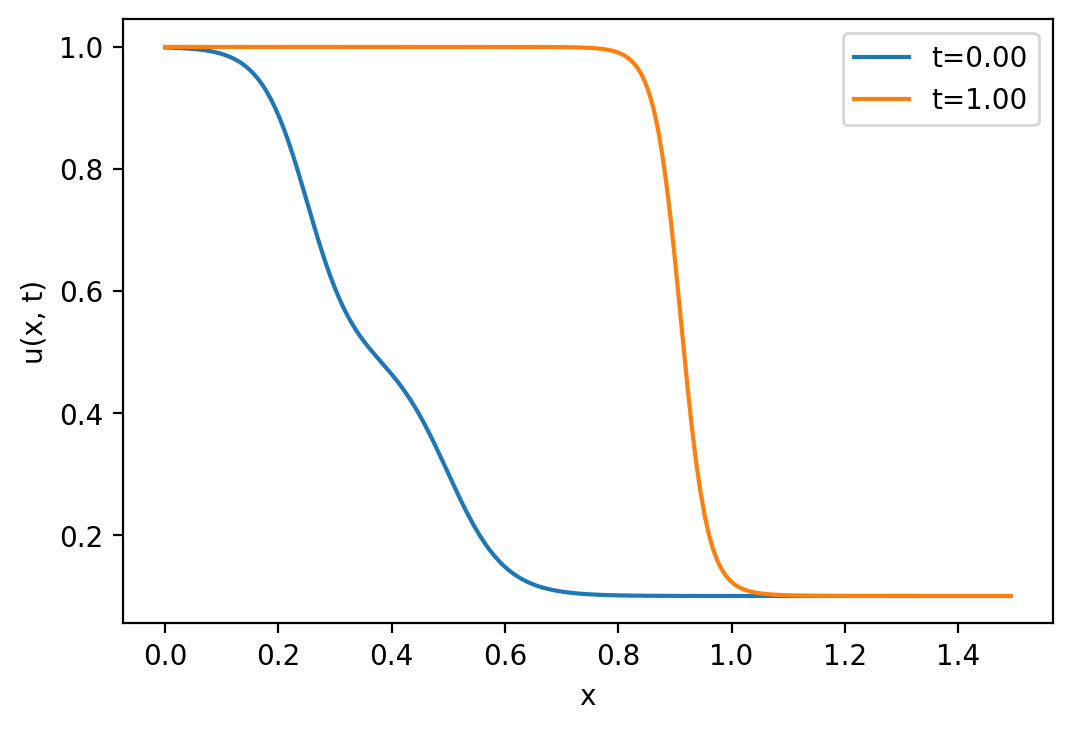

In [3]:
N2, S2 = 200, 1
ua = np.zeros((N2, S2 + 1))
dx = 1.5 / N2
dt = 1 / S2

for t in range(S2 + 1):
    for n in range(N2):
        ua[n, t] = burgers_analytical(n * dx, t * dt, 0.01)


fig, ax = plt.subplots(dpi=200)
ax.set_xlabel('x')
ax.set_ylabel('u(x, t)')
x = np.array([n * dx for n in range(N2)])
for t in range(S2 + 1):
    ax.plot(x, ua[:, t], label='t={:4.2f}'.format(t * dt))
    
plt.legend()
plt.show()

We discretize in domain space with $x_i = i \Delta x,\ i=\{0, \dots, N\}$ and $\Delta x = \frac{L}{N},\ L=b$ using finite difference method.

$u_{xx} = \frac{u_{i+1} - 2u_{i} + u_{i-1}}{(\Delta x)^2}$

$u_{x} = \frac{u_{i+1} - u_{i-1}}{2(\Delta x)}$

$u_{t} = \frac{u_{i+1} - u_{i}}{\Delta t}$

$u^{t+1}_{i} = u^{t}_{i} + \Delta t \Big(\nu \frac{u^{t}_{i+1} - 2 u^{t}_{i} + u^{t}_{i-1}}{(\Delta x)^2} - \frac{1}{4} u^{t}_{i} \frac{u^{t}_{i+1} - u^{t}_{i-1}}{\Delta x} \Big)$

## Explicit method

In [4]:
def set_initial_condition(N, L, S, T, func):
    """
    Set initial conditions used to compute burgers equation
    :param N: spatial discretization size
    :param L: spatial domain length
    :param S: time discretization size
    :param func: initial function of x at t=0
    """
    dx = L / N # Interval distance
    dt = T / S # Time distance
    
    u = np.zeros((N + 2, S + 1))
    u[0, :] = func(np.zeros(S+1), np.array([t * dt for n in range(S + 1)]))
    u[-1, :] = func(L * np.ones(S+1), np.array([t * dt for n in range(S + 1)]))
    u[:, 0] = func(np.array([n * dx for n in range(N + 2)]), np.zeros(N+2)) # t=0 is func(x)
    #u[0, :], u[-1, :] = 0, 0
 
    return u

In [5]:
def burgers_equation(u, S, nu, dx, dt):
    """
    Compute value of 1D viscous burgers equation for each time step.
    :param u: 2D array with initial values set
    :param S: time discretization size
    :param nu: viscosity parameter
    :param dx: spatial step
    :param dt: time step
    """
    for i in range(1, S): # t
        a = nu * (u[2:, i-1] - 2 * u[1:-1, i-1] + u[0:-2, i-1]) / (dx**2)
        b = 0.25 * u[1:-1, i-1] * ((u[2:, i-1] - u[0:-2, i-1]) / dx)
        u[1:-1, i] = u[1:-1, i-1] + dt * (a - b)
    return u

In [6]:
def plotter(u, dx, dt, samples=10, ylabel='u(x, t)'):
    """
    Plot wave equation at several steps
    """
    N, S = u.shape
    N -= 2
    
    fig, ax = plt.subplots(dpi=200)
    ax.set_ylim([-0.5, 2])
    ax.set_xlabel('x')
    ax.set_ylabel(ylabel)
    
    x = np.array([n * dx for n in range(N)])
    for i in range(S):
        if (i % samples == 0): ax.plot(x, u[1:-1, i], label='t={:4.2f}'.format(i * dt))
    
    plt.legend()
    plt.show()

In [7]:
def level(u, L, T, dx, dt):
    N, S = u.shape
    x = np.array([k * dx for k in range(N)])
    t = np.array([i * dt for i in range(S)])
    levels = np.arange(0, np.amax(u) + 0.01,  np.amax(u) / 20)
    fig, ax = plt.subplots(dpi=200)
    cf = ax.contourf(x, t, u.T, levels=levels)
    cbar = fig.colorbar(cf, ax=ax)
    ax.set_xlabel('x')
    ax.set_ylabel('t')

In [8]:
def experiment(L, T, dx, dt, nu, samples=10, plot=True):
    """
    :param L: spatial length
    :param T: max time
    :param nu: viscosity
    :param dx: L interval
    :param dt: T interval
    """
    N = int(L / dx) # Space discretization size
    S = int(T / dt) # Time discretization size
    f0 = lambda x, t: burgers_analytical(x, t, nu)

    u = set_initial_condition(N, L, S, T, f0) 
    u = burgers_equation(u, S, nu, dx, dt)
    
    if plot:
        plotter(u, dx, dt, samples)
        level(u, L, T, dx, dt)
    
    return u, dx, dt, L, T

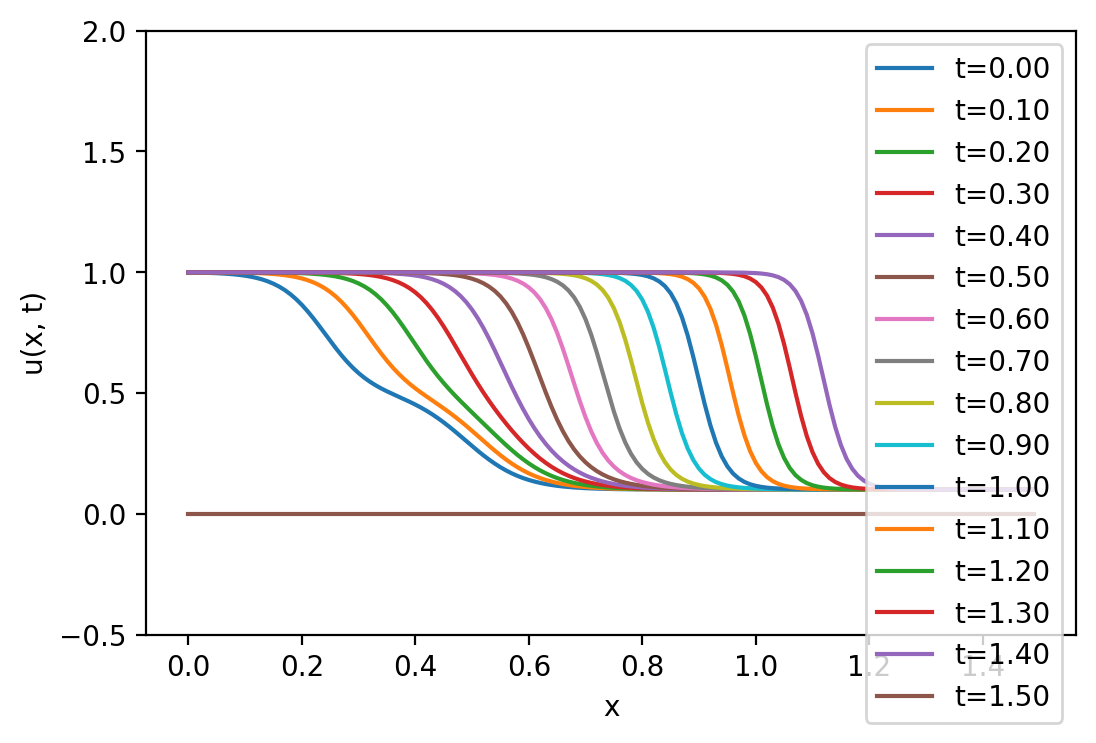

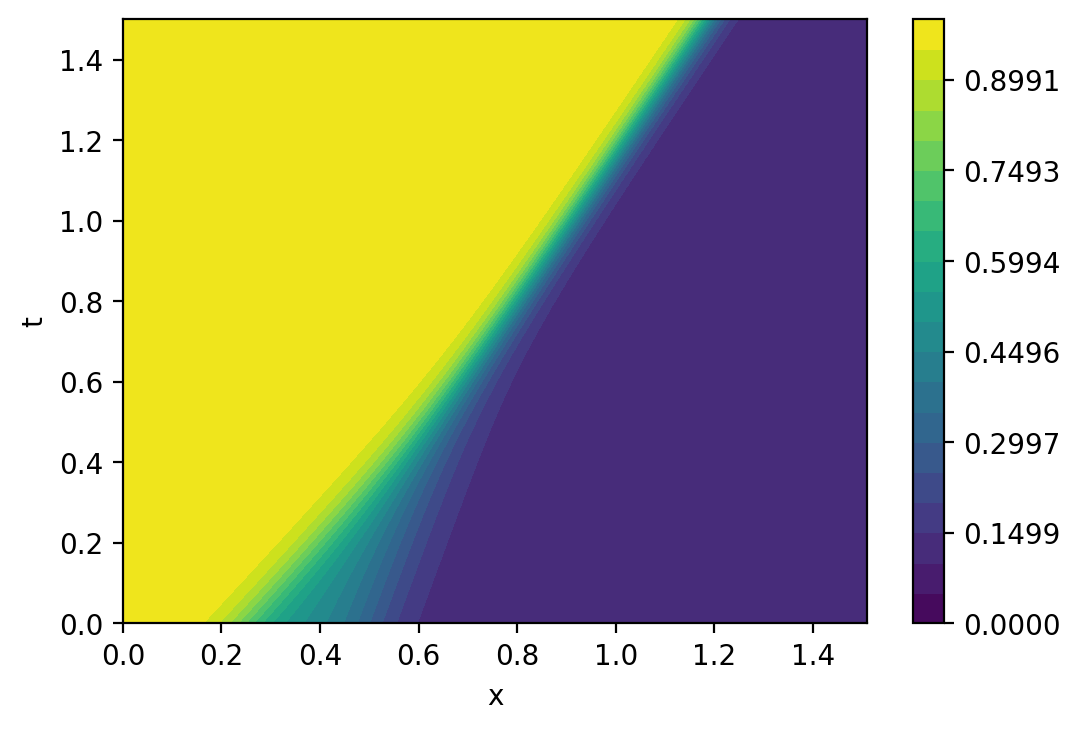

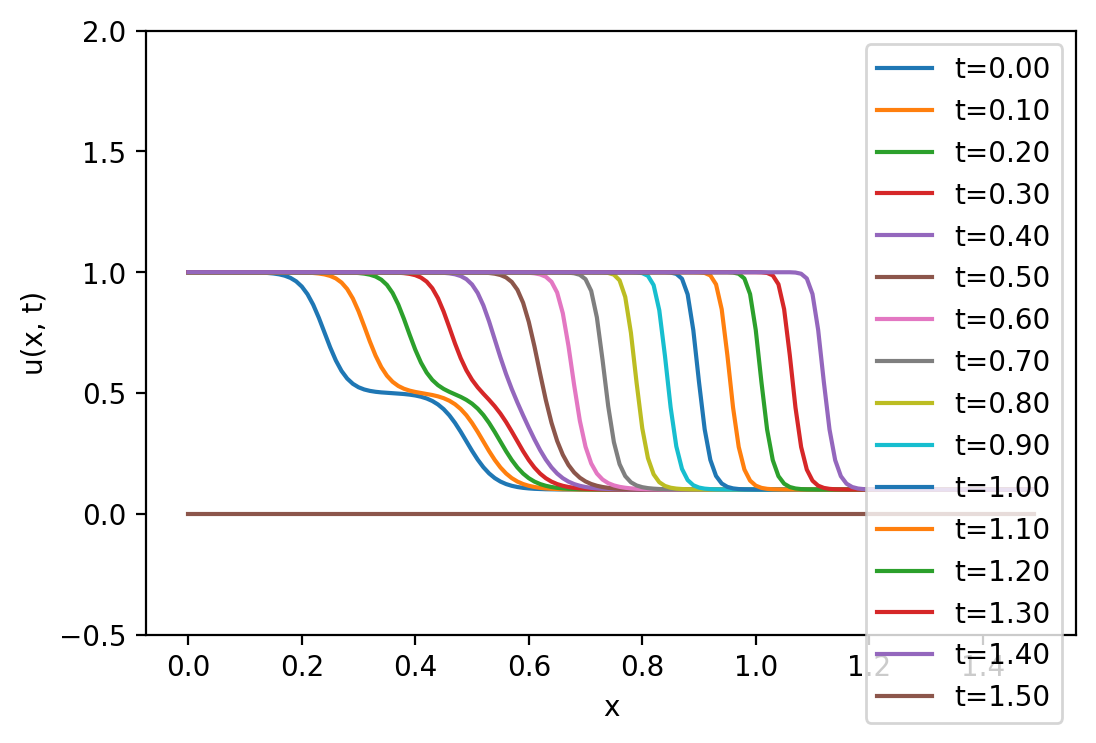

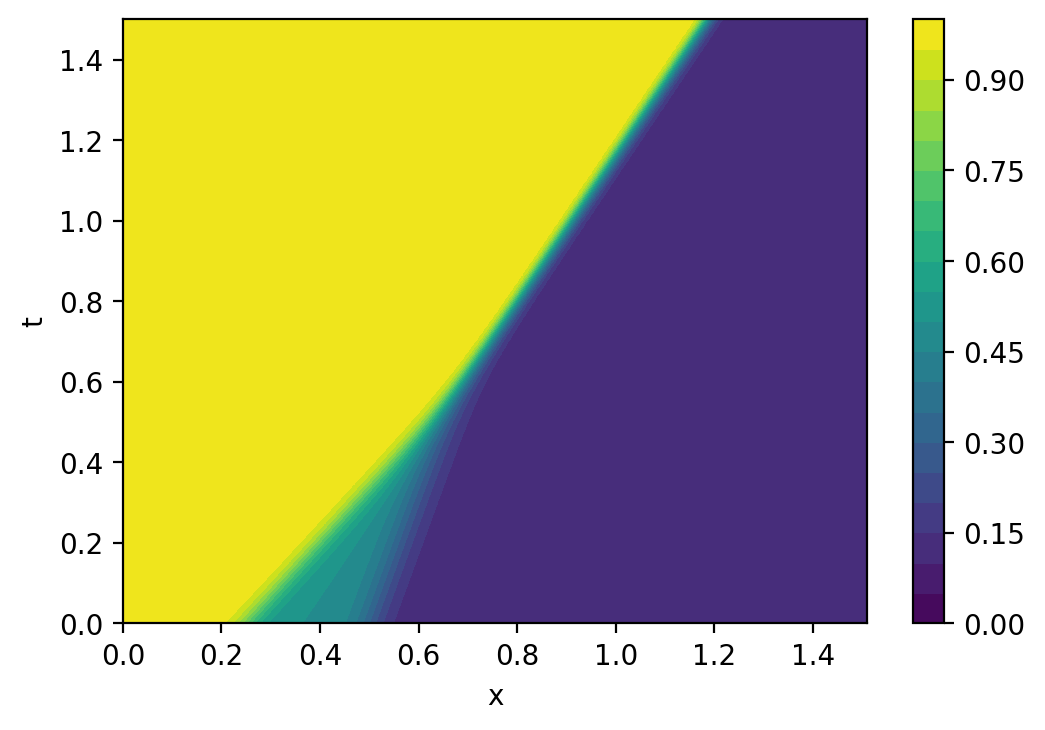

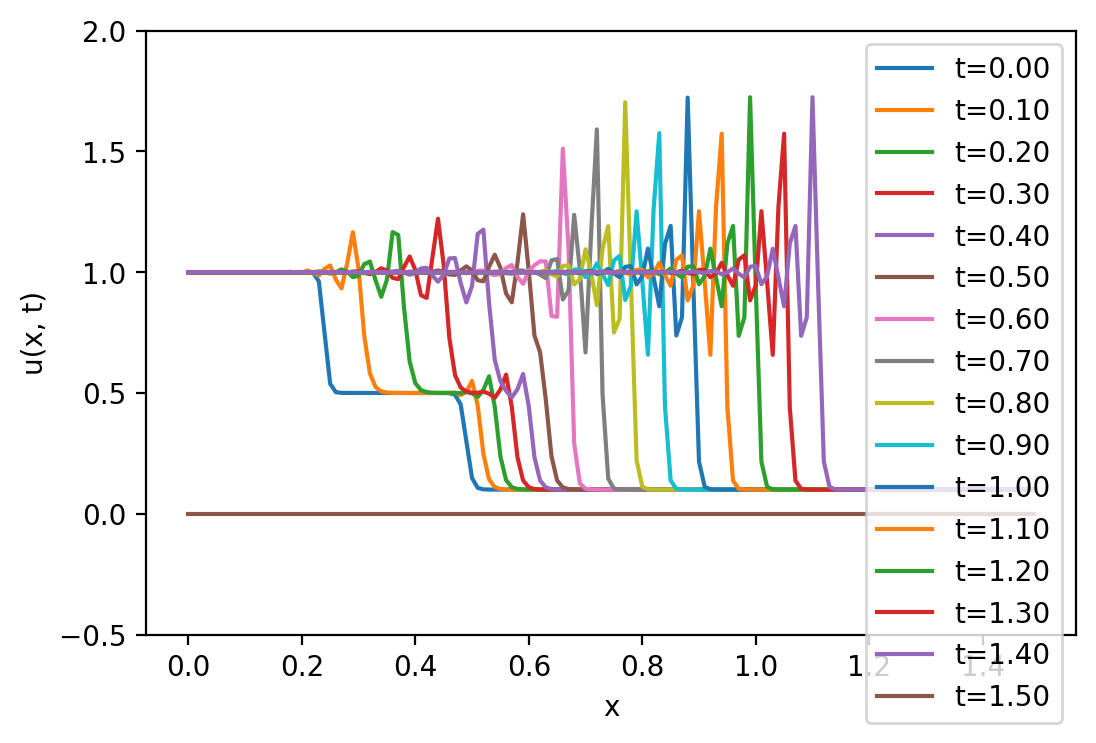

(array([[1. , 1. , 1. , ..., 1. , 1. , 1. ],
        [1. , 1. , 1. , ..., 1. , 1. , 0. ],
        [1. , 1. , 1. , ..., 1. , 1. , 0. ],
        ...,
        [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0. ],
        [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0. ],
        [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1]]),
 0.01,
 0.001,
 1.5,
 1.5)

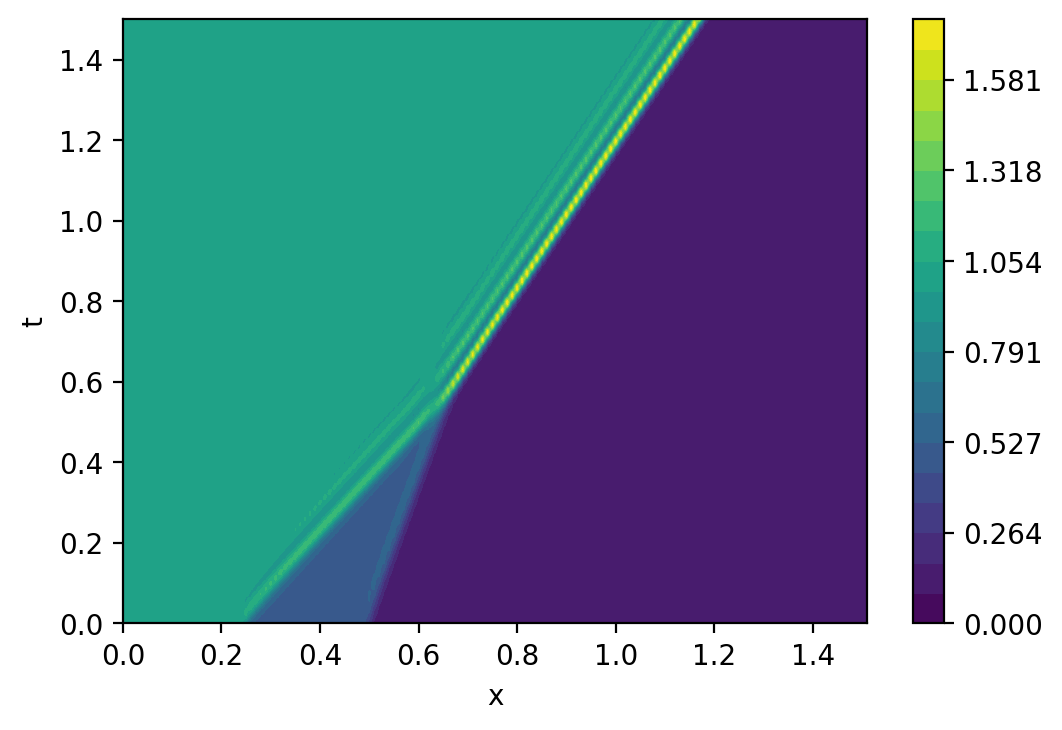

In [9]:
experiment(L=1.5, T=1.5, dx=0.01, dt=0.001, nu=0.01, samples=100)
experiment(L=1.5, T=1.5, dx=0.01, dt=0.001, nu=0.005, samples=100)
experiment(L=1.5, T=1.5, dx=0.01, dt=0.001, nu=0.001, samples=100)

The evolution of the equation with regards to time let us observe formation of a shock (or discontinuity), followed by traveling and it's dissipation.

With regards to the viscosity parameter $\nu$, it appears to influence on the discontinuity. As the viscosity is greater, we observe the model to be less influenced by perturbation (see $\nu=[0.01, 0.005]$), as it get smaller (see $\nu=0.001$) the burgers equations shows great variations.

---
## Relative error

Now we might focus on the accuracy of our numerical simulation. Let's have a look to the relative error between the numerical approximation and the analytical solution.

In [10]:
def relative_err(L, T, dx, dt, nu, debug=True):
    N = int(L / dx) # Space discretization size
    S = int(T / dt) # Time discretization size
    f0 = lambda x, t: burgers_analytical(x, t, nu)
    u_n = set_initial_condition(N, L, S, T, f0) 
    u_n = burgers_equation(u_n, S, nu, dx, dt)
    u_exacts = np.zeros((N, S + 1))
    
    err = np.zeros((N, S+1))
    
    for t in range(S):
        for n in range(N):
            u_exact = burgers_analytical(n * dx, t * dt, nu)
            e = np.true_divide(np.abs(u_n[n][t] - u_exact), np.abs(u_exact))
            err[n][t] = e
            u_exacts[n][t] = u_exact
    
    if debug:
        # Let's compare 2 curves at T=1.5
        fig, ax = plt.subplots(dpi=200)
        ax.set_xlabel('x')
        ax.set_ylabel('u(x, t)')
        N = int(L / dx)
        x = np.array([n * dx for n in range(N)])
        ax.plot(x, u_exacts[:, -2], label='u_exact(x, t=1.5)')
        ax.plot(x, u_n[1:-1, -2], label='u_n(x, t=1.5)')
        plt.legend()
        plt.show()
    
    return err

In [11]:
def plot_error(err, L, T, dx, dt, nb=10, step=10):
    fig, ax = plt.subplots(dpi=200)
    ax.set_xlabel('x')
    ax.set_ylabel('e')
    plt.yscale('log')

    N = int(L / dx)
    S = int(T / dt)
    x = np.array([n * dx for n in range(N)])
    for i in range(nb):
        if i * step < S:
            ax.plot(x, err[:, i * step], label='t={:4.2f}'.format(dt * i * step))
    
    plt.legend()
    plt.show()
    
def show_state(a, title, x='x', y='t'):
    """
    Graphic tool to show an image.
    This function was implemented to visualize unordered scatter data
    as this function isn't optimized in matplotlib.
    """
    _, axes = plt.subplots(1, 1, figsize=(16, 5))
    im = axes.imshow(a, origin='upper', cmap='inferno')
    plt.colorbar(im);
    plt.xlabel(x);
    plt.ylabel(y);
    plt.title(title)

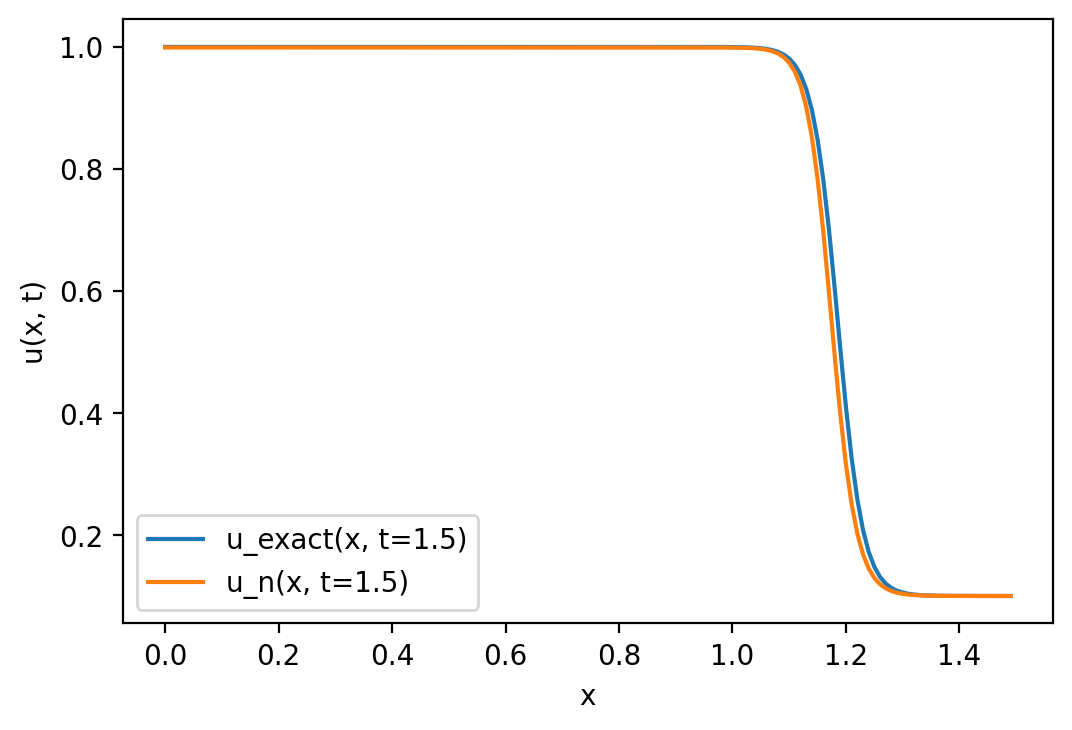

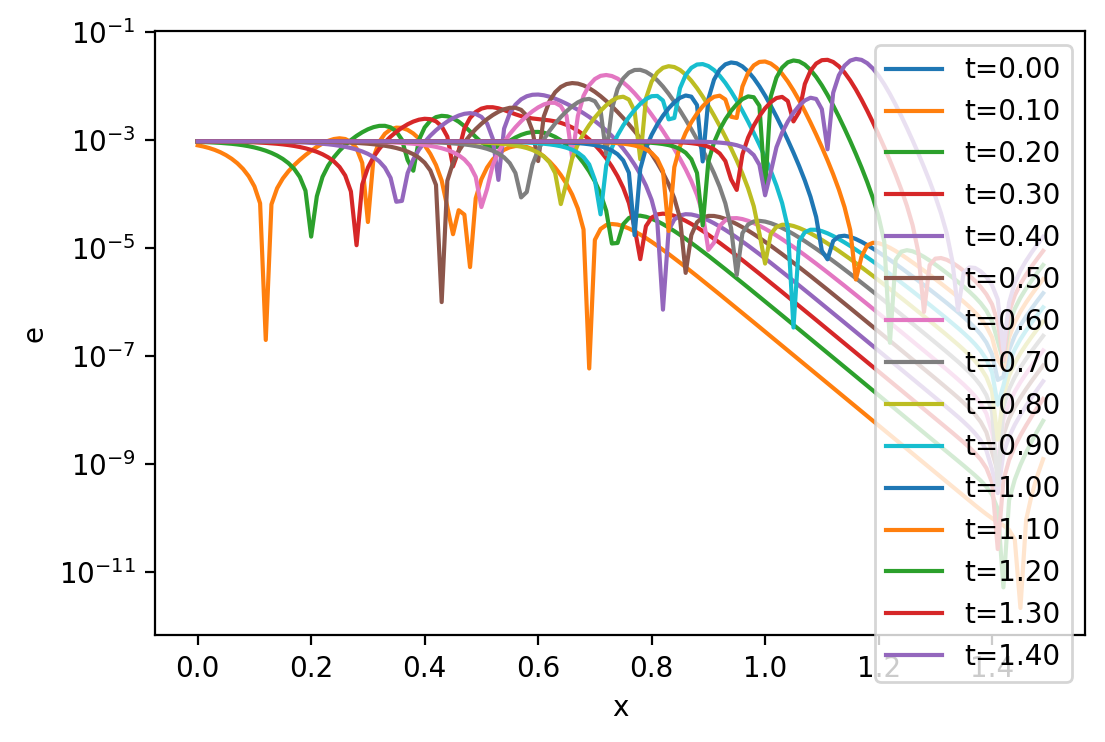

In [12]:
err = relative_err(L=1.5, T=1.5, dx=0.01, dt=0.001, nu=0.01, debug=True)
plot_error(err, L=1.5, T=1.5, dx=0.01, dt=0.001, nb=15, step=100)

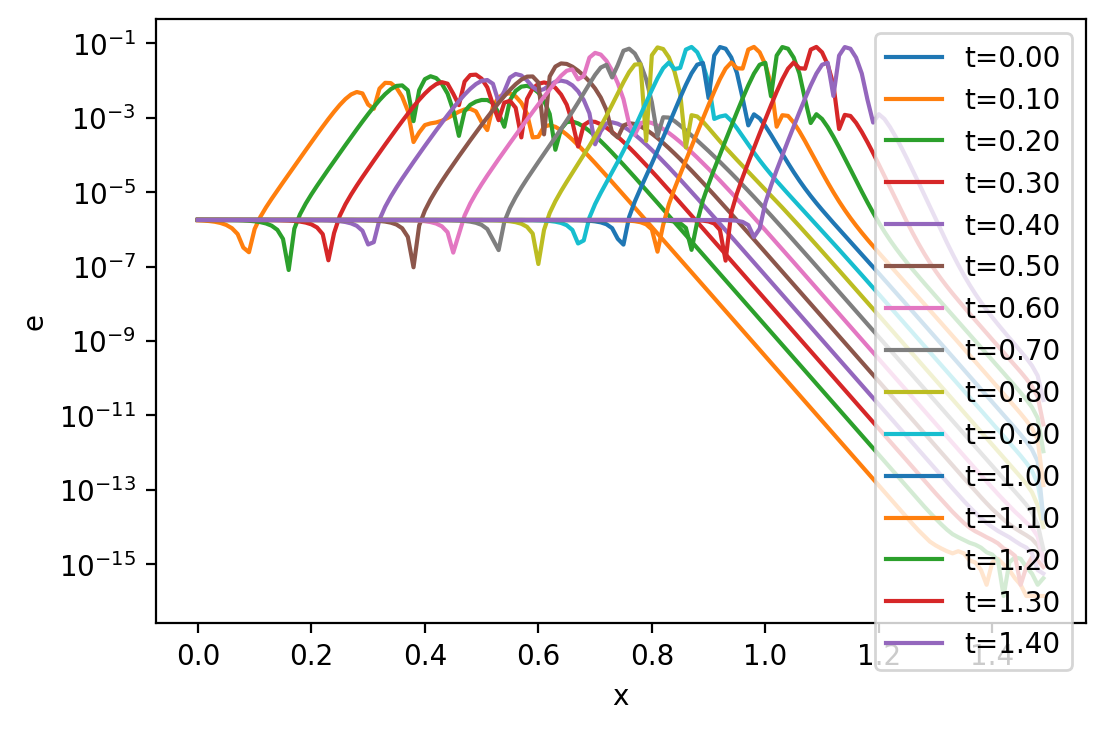

In [13]:
err = relative_err(L=1.5, T=1.5, dx=0.01, dt=0.001, nu=0.005, debug=False)
plot_error(err, L=1.5, T=1.5, dx=0.01, dt=0.001, nb=15, step=100)

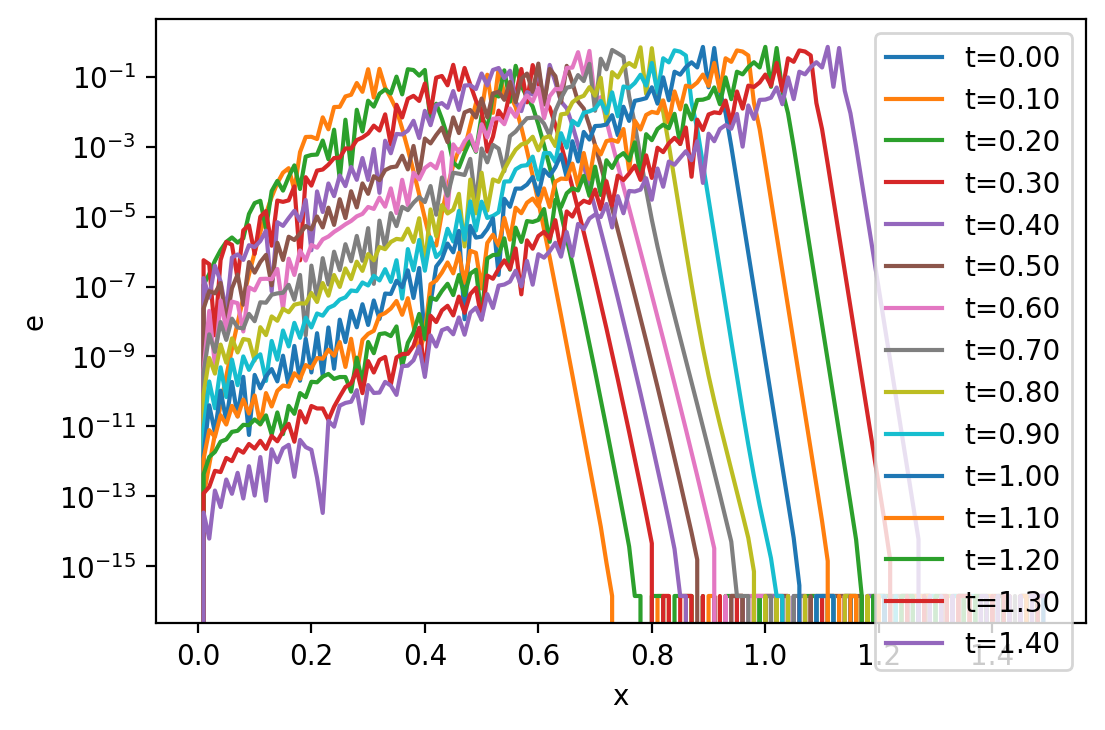

In [14]:
err = relative_err(L=1.5, T=1.5, dx=0.01, dt=0.001, nu=0.001, debug=False)
plot_error(err, L=1.5, T=1.5, dx=0.01, dt=0.001, nb=15, step=100)

Relative error appears to fluctuate in the spatial domain and over time (which actually corresponds to the propagation of the discontinuity). 
Now, the next step might be to insure the validity of the values obtains with regards to the limitation of numerical computation (rounding, data uncertainty and truncation).